In [1]:
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("mnist_train.csv")


In [8]:
rownum = 10
if -1 < rownum < len(data):
    pixels = data.iloc[rownum,1:].values.reshape(28,28)
    array1 = np.array(pixels).astype(np.uint8)
    image1 =Image.fromarray(array1)

Text(0.5, 1.0, 'Original Image')

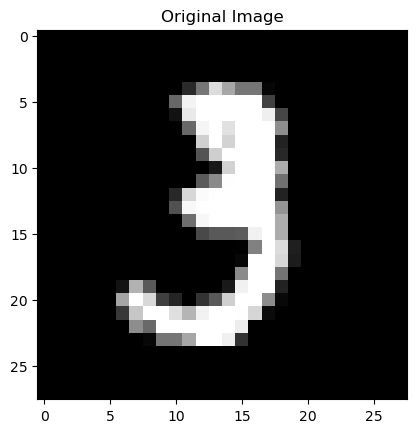

In [9]:
plt.imshow(array1,cmap='gray')
plt.title('Original Image')

In [12]:
def add_gaussian_noise(image,mean=0,sigma=10):
    noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = np.clip(image + noise,0,255)
    return noisy_image.astype(np.uint8)

Text(0.5, 1.0, 'gaussian image')

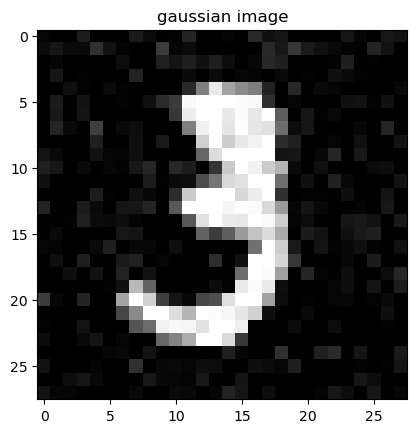

In [24]:
gauss_image = add_gaussian_noise(array1,0,20)
plt.imshow(gauss_image,cmap='gray')
plt.title("gaussian image")

In [6]:
def salt_and_pepper_noise(image,prob=0.05):
    noisy_image = image.copy()
    num_salt = int(prob * image.size//2)
    num_pepper = num_salt
    salt_coords = tuple(np.random.randint(0,dim, num_salt) for dim in image.shape)
    noisy_image[salt_coords] = 255
    pepper_coords = tuple(np.random.randint(0,dim, num_pepper) for dim in image.shape)
    noisy_image[pepper_coords] = 0
    return noisy_image
    

Text(0.5, 1.0, 'Salt Pepper Image')

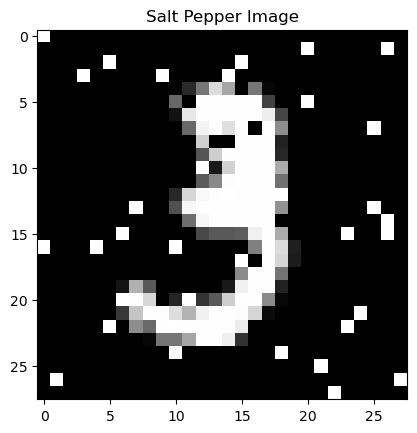

In [28]:
sp_image = salt_and_pepper_noise(array1,0.1)
plt.imshow(sp_image,cmap='gray')
plt.title("Salt Pepper Image")

In [41]:
def apply_average_filter(image,kernal_size=3):
    padded_image = np.pad(image, 
                      ((kernal_size // 2, kernal_size // 2), 
                       (kernal_size // 2, kernal_size // 2)), 
                      mode='constant', 
                      constant_values=0)
    filtered_image = np.zeros_like(image)
    for i in range(image.shape[1]):
        for j  in range(image.shape[0]):
            filtered_image[i,j]= np.mean(padded_image[i:i+kernal_size,j:j+kernal_size])
    return filtered_image.astype(np.uint8)

Text(0.5, 1.0, 'Average Filter on Gaussian Image')

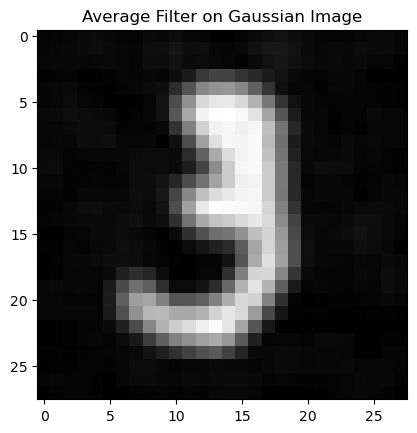

In [42]:
#average filter on gaussian noise
avg_image = apply_average_filter(gauss_image,3)
plt.imshow(avg_image,cmap ='gray')
plt.title("Average Filter on Gaussian Image")

In [44]:
def apply_median_filter(image,kernal_size=3):
    padded_image = np.pad(image,
                         ((kernal_size//2,kernal_size//2),
                         (kernal_size//2,kernal_size//2)),
                         mode='constant',
                         constant_values=0)
    filtered_image = np.zeros_like(image)
    for i in range(image.shape[1]):
        for j in range(image.shape[0]):
            filtered_image[i,j] = np.median(padded_image[i:i+kernal_size,j:j+kernal_size])
    return filtered_image.astype(np.uint8)

Text(0.5, 1.0, 'Median filter on Salt Pepper Image')

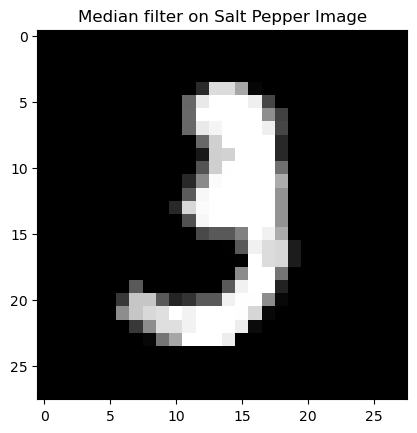

In [45]:
#median filter on gaussian image
median_image = apply_median_filter(sp_image,3)
plt.imshow(median_image,cmap='gray')
plt.title('Median filter on Salt Pepper Image')